In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [60]:
df_oecd= pd.read_csv('E:/Python Projects/shohreh/Shohreh_GitHub_Repository/Data-Analysis-And-Machine-Learning-Projects/4. Public health and safety/LifeSatisfaction/oecd_bli_2015.csv', thousands=',')

In [3]:
df_oecd.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN


In [4]:
life_sat_total = df_oecd[df_oecd["INEQUALITY"]=="TOT"]
life_sat_total = life_sat_total.pivot(index="Country", columns="Indicator", values="Value")
life_sat_total.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [5]:
df_gdp_capital= pd.read_csv('E:/Python Projects/shohreh/Shohreh_GitHub_Repository/Data-Analysis-And-Machine-Learning-Projects/4. Public health and safety/LifeSatisfaction/gdp_per_capita.csv', delimiter= '\t', encoding= 'latin1', thousands=',')

In [6]:
df_gdp_capital.rename(columns={"2015" : 'GDP per capital (USD)'}, inplace= True)
df_gdp_capital.set_index('Country')
df_gdp_capital.head(2)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capital (USD),Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [12]:
full_country_stats = pd.merge(left=life_sat_total, right=df_gdp_capital, on= 'Country')

In [18]:
df = pd.DataFrame({
    'Country': full_country_stats['Country'],
    'Life satisfaction': full_country_stats['Life satisfaction'],
    'GDP per capital (USD)': full_country_stats['GDP per capital (USD)']
})

# other option
#df = full_country_stats[['Country', 'Life satisfaction', 'GDP per capital (USD)']]

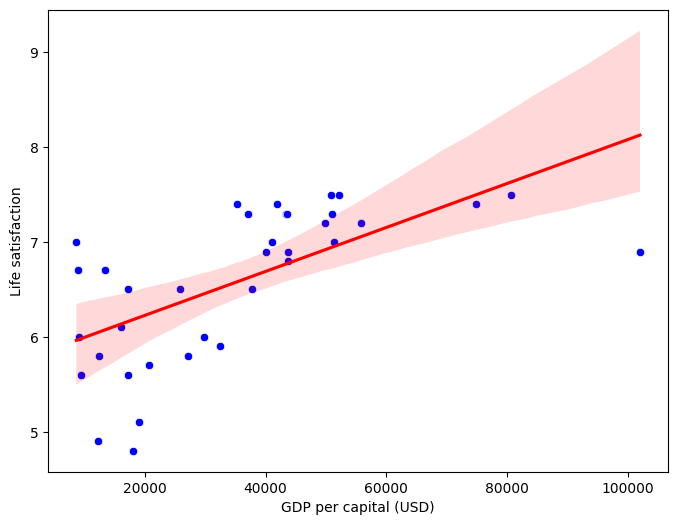

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data= df, x= 'GDP per capital (USD)', y= 'Life satisfaction', color= 'blue')
sns.regplot(data= df, x= 'GDP per capital (USD)', y= 'Life satisfaction', scatter= False, color= 'red')
plt.xlabel('GDP per capital (USD)')
plt.ylabel('Life satisfaction')
plt.show()

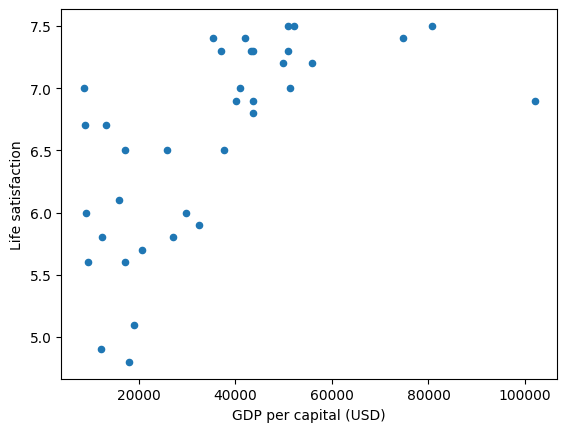

In [39]:
df.plot(kind= 'scatter', x= 'GDP per capital (USD)', y= 'Life satisfaction')
plt.show()

In [54]:
X= np.c_[df['GDP per capital (USD)']]
y= df['Life satisfaction']

model1= LinearRegression()
model1.fit(X,y)
New_X= [[22587]]
model1.predict(New_X)

array([6.28653637])

In [58]:
model2= KNeighborsRegressor(n_neighbors=3)
model2.fit(X,y)
New_X= [[22587]]
model2.predict(New_X)

array([5.76666667])